In [1]:
from keras.datasets import boston_housing
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data(path='./boston_housing.npz')

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of f553886a1f8d56431e820c5b82552d9d95cfcb96d1e678153f8839538947dff5 so we will re-download the data.
57344/57026 [==============================] - 0s 5us/step


In [3]:
# 数据标准化
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [11]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


In [12]:
# K折验证
k = 4
num_val_samples = len(train_data)//k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processiong fold # ', i)
    val_data = train_data[i * num_val_samples: (i+1)*num_val_samples]
    val_target = train_targets[ i * num_val_samples: (i+1)*num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1)*num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
         train_targets[(i+1)*num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_target, verbose=0)
    all_scores.append(val_mae)

processiong fold #  0
processiong fold #  1
processiong fold #  2
processiong fold #  3


In [13]:
print(all_scores)

[1.9403159618377686, 2.233099937438965, 2.750046491622925, 2.5471081733703613]


In [15]:
np.mean(all_scores)

2.367642641067505

In [23]:
# 保存每折的验证结果
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processiong fold # ', i)
    val_data = train_data[i * num_val_samples: (i+1)*num_val_samples]
    val_target = train_targets[ i * num_val_samples: (i+1)*num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1)*num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
         train_targets[(i+1)*num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_target),
                        epochs=num_epochs, batch_size=1, verbose=0)
    history_dict = history.history
    print(history_dict.keys())

processiong fold #  0
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processiong fold #  1
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processiong fold #  2
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processiong fold #  3
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [25]:
# 保存每折的验证结果
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processiong fold # ', i)
    val_data = train_data[i * num_val_samples: (i+1)*num_val_samples]
    val_target = train_targets[ i * num_val_samples: (i+1)*num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1)*num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
         train_targets[(i+1)*num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_target),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)


processiong fold #  0
processiong fold #  1
processiong fold #  2
processiong fold #  3


In [26]:
#记录每个轮次所有mae的平均值
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

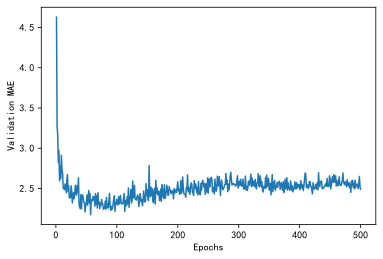

In [27]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' #画的图更清晰
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [37]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [38]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

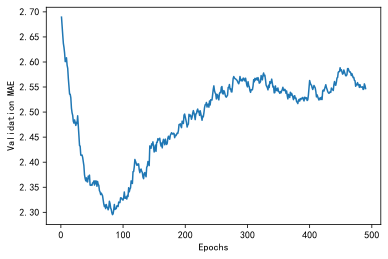

In [39]:
plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [33]:
model = build_model()
model.fit(train_data, train_targets,
         epochs=80,batch_size=16,verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 15.7334 - mae: 2.5122


In [34]:
test_mae_score

2.5121967792510986

预测的房价和实际价格相差约2512美元